In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [33]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading processed data

In [2]:
DATA_PATH = '../../data/processed'

def load_data(year, img_h=1400, img_w=1400):

    X = []
    y = []

    data_dir = os.path.join(DATA_PATH, str(year))
    frames_dir = os.path.join(data_dir, 'frames')
    masks_dir = os.path.join(data_dir, 'masks')

    for file in sorted(os.listdir(frames_dir)):
        if file.startswith('R'):
            filename = file.split('.')[0]

            frame = np.load(os.path.join(frames_dir, filename + '.npy'))
            mask = np.load(os.path.join(masks_dir, filename + '_labels.npy'))
            X.append(frame[:img_h, :img_w, :])
            y.append(mask[:img_h, :img_w])

    X = np.array(X)
    y = np.array(y)

    return X, y

## Processing data for model

In [31]:
# Reshape data so that columns are spectral bands and rows are pixels
def reshape_data(X, y):
    X_reshaped = X.reshape(-1, X.shape[-1])
    y_reshaped = y.reshape(-1)

    return X_reshaped, y_reshaped

def standardizer(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

## Visualization functions

In [21]:
def plot_image(image, factor=1):
    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)
        
def plot_labels(labels):
    plt.imshow(labels)

## Loading and visualizing 2018 data

In [37]:
X, y = load_data(2018)

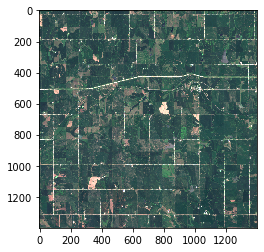

In [22]:
X_sample = X[0]
y_sample = y[0]

plot_image(X_sample[:,:,[3,2,1]], 7)

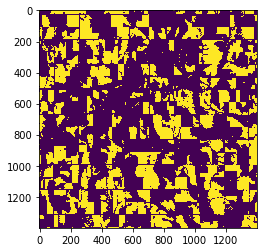

In [23]:
plot_labels(y_sample)

## Making predictions on 2018 dataset

In [20]:
MODEL_PATH = '../../models'

def load_model(filename):
    # Load from file
    with open(os.path.join(MODEL_PATH, filename), 'rb') as file:
        pickle_model = pickle.load(file)
        
    return pickle_model

In [26]:
log_reg = load_model('log_model_2017_07_19.pkl')

In [34]:
X, y = reshape_data(X, y)
X_scaled = standardizer(X)
y_pred = log_reg.predict(X_scaled)

## Results

In [40]:
# Intersection-over-union metric
def iou(confusion_matrix):
    tn, fp, fn, tp = confusion_matrix.ravel()
    iou = tp / (tp + fn + fp)
    return iou

In [43]:
cm = confusion_matrix(y, y_pred)

print('Accuracy: %.2f' % accuracy_score(y, y_pred))
print('Intersection-over-Union: %.2f' % iou(cm))
print('Confusion Matrix: \n', cm)
print('Classification report:\n', classification_report(y, y_pred))

Accuracy: 0.90
Intersection-over-Union: 0.72
Confusion Matrix: 
 [[29740397  2287324]
 [ 2054744 10997535]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93  32027721
           1       0.83      0.84      0.84  13052279

    accuracy                           0.90  45080000
   macro avg       0.88      0.89      0.88  45080000
weighted avg       0.90      0.90      0.90  45080000



## Visualizing predictions

In [45]:
y_pred = y_pred.reshape(23, 1400, 1400)
y = y.reshape(23, 1400, 1400)

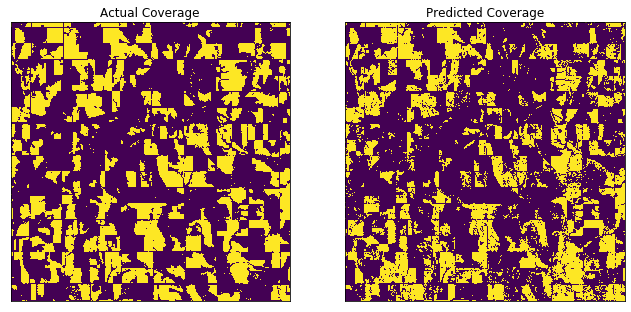

In [53]:
f = plt.figure(figsize=(11,6))

plt.subplot(121)
plt.title('Actual Coverage')
plt.xticks([])
plt.yticks([])
plt.imshow(y[0])

plt.subplot(122)
plt.title('Predicted Coverage')
plt.xticks([])
plt.yticks([])
plt.imshow(y_pred[0])

## More granular visualization

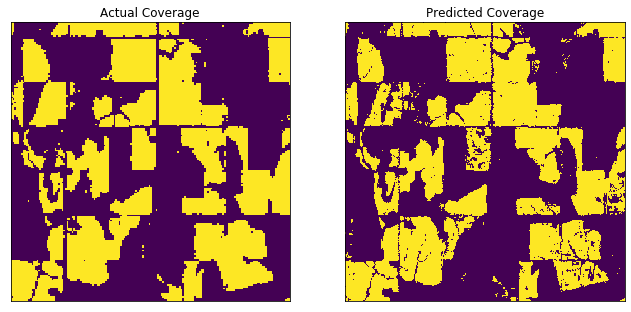

In [64]:
f = plt.figure(figsize=(11,6))

plt.subplot(121)
plt.title('Actual Coverage')
plt.xticks([])
plt.yticks([])
plt.imshow(y[0][:500,:500])

plt.subplot(122)
plt.title('Predicted Coverage')
plt.xticks([])
plt.yticks([])
plt.imshow(y_pred[0][:500,:500])